# PCA: finding out which features are the most important

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Part 1: Importing the data and exploring it

### Importing cancer data

In [2]:
cancer_data = pd.read_csv("../data_clean/CDC_CancerByCounty/incidencerates/cancer_by_type.csv")
cancer_data.head()

,locale,fips,met_health_obj,incidence rate_per_100000,incidence rate_lower_95_confidence,incidence rate_upper_95_confidence,annual_count_avg,recent_trend_str,trend_last_5,trend_last_5_lower_95_confidence,...,cancer,file_name,race,sex,source_url,stage,stateFIPS,type,state,cancer_description
0,"US (SEER+NPCR)(1,10)",0.0,***,448.0,447.7,448.4,1638110.0,falling,-0.9,-1.6,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,29,incd,missouri,All Cancer Sites
1,"US (SEER+NPCR)(1,10)",0.0,***,11.7,11.7,11.8,43864,stable,0.5,-0.7,...,3,incidencerates_016.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,29,incd,missouri,Oral Cavity & Pharynx
2,"US (SEER+NPCR)(1,10)",0.0,***,4.5,4.5,4.6,17084,stable,-0.8,-1.6,...,17,incidencerates_009.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,29,incd,missouri,Esophagus
3,"US (SEER+NPCR)(1,10)",0.0,***,6.6,6.5,6.6,23871,falling,-1.3,-2.0,...,18,incidencerates_020.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,29,incd,missouri,Stomach
4,"US (SEER+NPCR)(1,10)",0.0,Yes,38.7,38.6,38.8,140982,falling,-1.3,-2.1,...,20,incidencerates_008.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,29,incd,missouri,Colon & Rectum


In [3]:
cancer_data.columns

Index(['locale', 'fips', 'met_health_obj', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'annual_count_avg',
       'recent_trend_str', 'trend_last_5', 'trend_last_5_lower_95_confidence',
       'trend_last_5_upper_95_confidence', 'age', 'areatype', 'cancer',
       'file_name', 'race', 'sex', 'source_url', 'stage', 'stateFIPS', 'type',
       'state', 'cancer_description'],
      dtype='object')

In [4]:
cancer_data = cancer_data[['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description']]
cancer_data.head()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description
0,"US (SEER+NPCR)(1,10)",0.0,1638110.0,country,1,29,missouri,All Cancer Sites
1,"US (SEER+NPCR)(1,10)",0.0,43864,country,3,29,missouri,Oral Cavity & Pharynx
2,"US (SEER+NPCR)(1,10)",0.0,17084,country,17,29,missouri,Esophagus
3,"US (SEER+NPCR)(1,10)",0.0,23871,country,18,29,missouri,Stomach
4,"US (SEER+NPCR)(1,10)",0.0,140982,country,20,29,missouri,Colon & Rectum


In [5]:
cancer_data.tail()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description
52656,"Weston County(6,10)",56045.0,3 or fewer,county,86,56,wyoming,Non-Hodgkin Lymphoma
52657,"Weston County(6,10)",56045.0,3 or fewer,county,90,56,wyoming,Leukemia
52658,"Weston County(6,10)",56045.0,3 or fewer,county,400,56,wyoming,Breast (in situ) (Female)
52659,"Weston County(6,10)",56045.0,3 or fewer,county,515,56,wyoming,"Childhood (Ages <20, All Sites)"
52660,"Weston County(6,10)",56045.0,3 or fewer,county,516,56,wyoming,"Childhood (Ages <15, All Sites)"


In [6]:
cancer_data.head()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description
0,"US (SEER+NPCR)(1,10)",0.0,1638110.0,country,1,29,missouri,All Cancer Sites
1,"US (SEER+NPCR)(1,10)",0.0,43864,country,3,29,missouri,Oral Cavity & Pharynx
2,"US (SEER+NPCR)(1,10)",0.0,17084,country,17,29,missouri,Esophagus
3,"US (SEER+NPCR)(1,10)",0.0,23871,country,18,29,missouri,Stomach
4,"US (SEER+NPCR)(1,10)",0.0,140982,country,20,29,missouri,Colon & Rectum


In [7]:
# converting type of "fips" to int64
cancer_data['fips'] = cancer_data['fips'].astype("int64")

In [8]:
# number of fips codes for which cancer data is available
len(cancer_data['fips'].unique())

2360

### Importing industry data per county

In [9]:
industry_data = pd.read_csv("../data_clean/indicators_per-industry_per-county.csv")
industry_data.head()

,Unnamed: 0,fips,county,name,industry_code,industry_detail,relevant_naics,year,payann,estab,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,0,8001,1,"Adams County, Colorado",113000,timber and raw forest products,[113],2012,0,1,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,1,8001,1,"Adams County, Colorado",115000,agriculture and forestry support,[115],2012,290,6,...,0.00008,0.0,3.405586,0.0,0.000183,0.008769,0.95877,2.011564,211.423463,15.653502
2,2,8001,1,"Adams County, Colorado",211000,unrefined oil and gas,[211],2012,0,6,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,3,8001,1,"Adams County, Colorado",2122a0,"iron, gold, silver, and other metal ores","[21221, 21222, 21229]",2012,0,1,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,4,8001,1,"Adams County, Colorado",212310,dimensional stone,[21231],2012,0,4,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


#### Removing un-necessary columns

In [10]:
industry_data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
def remove_useless(df):
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df.drop(col, axis=1, inplace=True)

In [12]:
remove_useless(industry_data)
industry_data.columns

Index(['fips', 'county', 'name', 'industry_code', 'industry_detail',
       'relevant_naics', 'payann', 'estab', 'emp', 'ACID', 'ENRG', 'ETOX',
       'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX',
       'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN',
       'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [13]:
industry_data.head()

,fips,county,name,industry_code,industry_detail,relevant_naics,payann,estab,emp,ACID,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,8001,1,"Adams County, Colorado",113000,timber and raw forest products,[113],0,1,0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,8001,1,"Adams County, Colorado",115000,agriculture and forestry support,[115],290,6,10,0.537394,...,0.00008,0.0,3.405586,0.0,0.000183,0.008769,0.95877,2.011564,211.423463,15.653502
2,8001,1,"Adams County, Colorado",211000,unrefined oil and gas,[211],0,6,0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,8001,1,"Adams County, Colorado",2122a0,"iron, gold, silver, and other metal ores","[21221, 21222, 21229]",0,1,0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,8001,1,"Adams County, Colorado",212310,dimensional stone,[21231],0,4,0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [14]:
# Number of available fips codes
len(industry_data['fips'].unique())

3140

### Finding out diffrerences in "fips" values between the two datasets
Check the counties_fips.csv file in data_raw to find out if fips value actually corresponds to a county or if it corresponds to a state of national value.

In [15]:
industry_fips = set(industry_data['fips'].unique())
cancer_fips = set(cancer_data['fips'].unique())

#### Getting "fips" values in cancer data that don't have corresponding industry data and the other way around

In [16]:
cancer_diff_industry = cancer_fips.difference(industry_fips)
print(cancer_diff_industry)

{0, 48000, 32000, 16000, 53000, 37000, 21000, 5000, 48269, 42000, 26000, 10000, 47000, 2201, 31000, 15000, 15005, 36000, 20000, 4000, 41000, 25000, 9000, 46000, 30000, 51000, 2232, 35000, 19000, 56000, 40000, 24000, 8000, 45000, 29000, 13000, 51917, 50000, 34000, 18000, 2900, 55000, 39000, 23000, 44000, 28000, 12000, 33000, 17000, 1000, 2280, 49000, 54000, 38000, 22000, 6000, 27000}


In [17]:
county_corresp_fips = pd.read_csv('../data_raw/counties_fips.csv')

In [18]:
county_corresp_fips.head()

,FIPS,Name,State
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL


In [19]:
# getting fips values which correspond to actual counties but don't have entries in the industry dataset
missing_industry_values = set()
for fips in cancer_diff_industry:
    if not county_corresp_fips[county_corresp_fips['FIPS'] == fips].empty:
        missing_industry_values.add(fips)
print(missing_industry_values)

{2232, 2201, 2280, 48269}


In [20]:
industry_diff_cancer = industry_fips.difference(cancer_fips)
len(industry_diff_cancer)

837

In [21]:
#getting fips values that don't correspond to actual counties but have entries in the industry dataset
extra_industry_values = set()
for fips in industry_diff_cancer:
    if county_corresp_fips[county_corresp_fips['FIPS'] == fips].empty:
        extra_industry_values.add(fips)
print(extra_industry_values)

{2275, 2195, 2230, 2198, 2105}


### Joining datasets on "fips" column

#### Inner join: Only keep fips values that are in both datasets

In [22]:
df_inner = pd.merge(cancer_data, industry_data, on='fips', how='inner')

In [23]:
len(df_inner["fips"].unique())

2303

#### Right join: Keep all "fips" values from the industry dataset

In [24]:
df_right = pd.merge(cancer_data, industry_data, on='fips', how='right')

In [25]:
len(df_right["fips"].unique())

3140

#### Left join: Keep all "fips" values from the cancer dataset

In [26]:
df_left = pd.merge(cancer_data, industry_data, on='fips', how='left')

In [27]:
len(df_left["fips"].unique())

2360

## Part 2: analysis

For now we'll work with the resulting inner_join data because it is the most complete

Names of environemental factors: ['Acid Rain', 'Energy', 'Freshwater Aquatic Ecotoxicity', 'Eutrophication', 'Food Waste', 'Global Climate Change', 'Hazardous Air Pollutants', 'Hazardous Waste', 'Human Health Cancer', 'Human Health Noncancer', 'Human Health - Respiratory Effects', 'Human Health Cancer and Noncancer', 'Employment', 'Land', 'Metals', 'Minerals and Metals', 'Muncipal Solid Waste', 'Nonrenewable Energy', 'Ozone Depletion', 'Pesticides', 'Renewable Energy', 'Smog Formation', 'Value Added', 'Water']

In [28]:
df_inner.columns

Index(['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description', 'county', 'name', 'industry_code',
       'industry_detail', 'relevant_naics', 'payann', 'estab', 'emp', 'ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [29]:
df_inner.head()

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,county,name,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,304.0,county,1,1,alabama,All Cancer Sites,1,"Autauga County, Alabama",...,0.000066,0.0,3.210888,0.000000,3.767853e-07,0.012181,0.275217,20.041190,654.873075,136.234634
1,"Autauga County(6,10)",1001,304.0,county,1,1,alabama,All Cancer Sites,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Autauga County(6,10)",1001,304.0,county,1,1,alabama,All Cancer Sites,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Autauga County(6,10)",1001,304.0,county,1,1,alabama,All Cancer Sites,1,"Autauga County, Alabama",...,0.047113,0.0,23.518978,435169.166702,1.886537e-03,0.000006,293448.484963,2400.143851,11995.153334,7473.552102
4,"Autauga County(6,10)",1001,304.0,county,1,1,alabama,All Cancer Sites,1,"Autauga County, Alabama",...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df_inner['stateFIPS'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

### Let's use PCA on the data_set

In [45]:
df_factors = df_inner[['ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
df_factors=df_factors.rename(columns={'annual_count_avg': "cancer"})

In [51]:
# TODO: Replace 3 or fewer value by randomly choosing 0, 1, 2, 3
df_factors['cancer'].unique()

array(['304.0', '8', '3 or fewer', ..., '248.0', '2452.0', '326.0'],
      dtype=object)

#### Covariance matrices

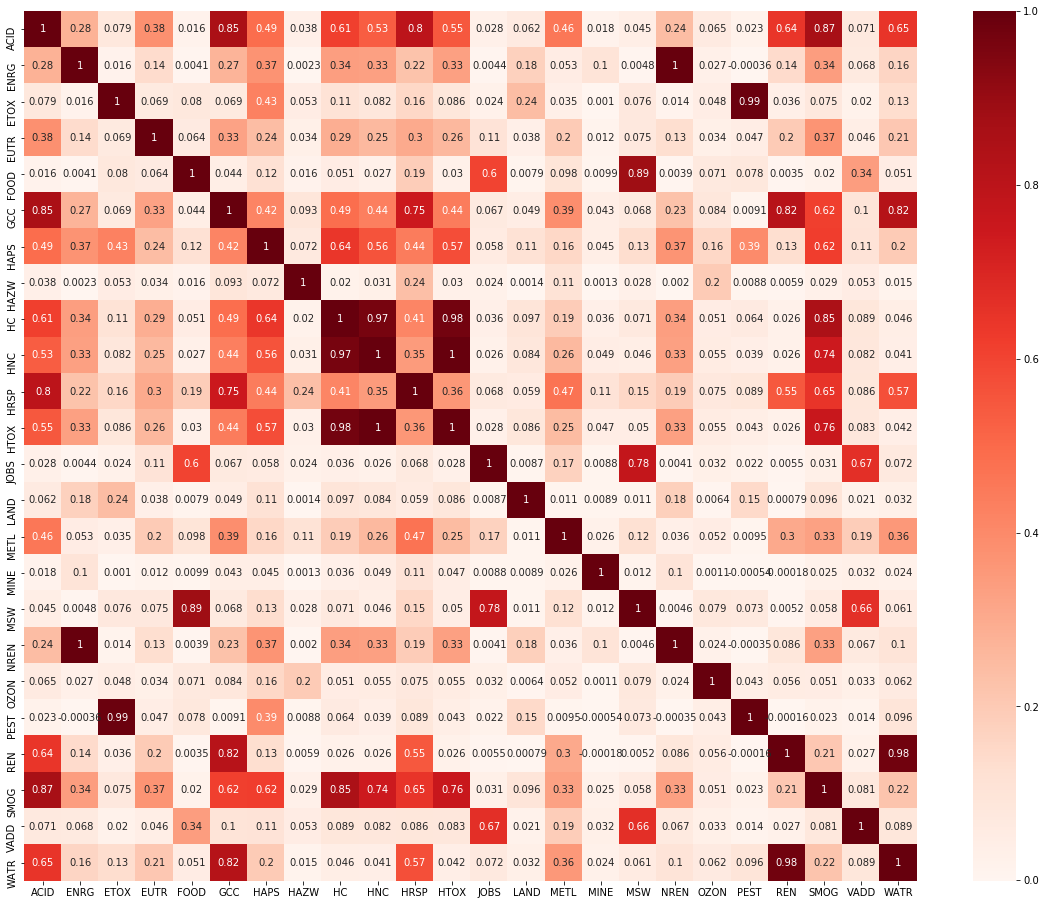

In [47]:
X = df_factors.iloc[:,0:24]  #independent columns
y = df_factors.iloc[:,-1]    #target column i.e cancer_rates
#get correlations of each features in dataset
corrmat = df_factors.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))
#plot heat map
g=sns.heatmap(df_factors[top_corr_features].corr(),annot=True,cmap='Reds')
# doesn't show cancer column because it has vaules that are strings

#### PCA model

In [36]:
pca = PCA(n_components=24, svd_solver='full')
pca.fit(df_factors.loc[:, df_factors.columns != 'annual_count_avg'])

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [38]:
pca.singular_values_

array([2.81280385e+09, 2.06340105e+08, 1.46563582e+08, 6.62401758e+07,
       4.95302414e+07, 2.63797371e+07, 2.66561514e+06, 2.30385536e+06,
       2.09713549e+06, 7.38181277e+05, 4.63361231e+05, 2.54331914e+05,
       4.34554548e+04, 2.27082756e+04, 8.84226670e+03, 6.79066765e+03,
       1.85208472e+03, 4.76587591e+01, 1.31694239e+01, 3.12992441e+00,
       1.28821813e-01, 1.61722398e-03, 3.05382013e-04, 1.52935655e-06])

### Now we want to get the most important environemental indicators that affect the annual_count_avg:
Let's build a regression model that connect environemental factors and incidence rates

Get code from regression models from Nazanin's notebooks

### Now we want to predict industry identifier based on Environemental values

In [ ]:
# TODO: Test different classifiers

### Question to be answered how do we caracterize the size of an industry ?
### Also we also want to predict Envirenemental values out of which industries are present in a county and the size of each industry (This is useful for the what if analysis)